In [1]:
from __future__ import print_function

import os
import cv2
import numpy as np
import re
import csv
from PIL import Image
from matplotlib import pyplot

import tensorflow.keras
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam

In [2]:
folders = []
path = os.getcwd() + "\AllframeData"

obj = os.scandir(os.getcwd() + "\AllframeData") 
print("Files and Directories in '% s'" % path) 

for entry in obj : 
    if entry.is_dir() or entry.is_file():
        folders.append(entry.name)

Files and Directories in 'C:\Users\main\AllframeData'


In [3]:
def edit_csvfiles(directory):
    for filename in os.listdir(directory):
        if filename == "DefectResult.csv":
            #print("found defectresults")
            inputfile = csv.reader(open(directory + '\\DefectResult.csv','r'))
            outputfile = open(directory + '\\DefectResult_edited.csv','w')
            i=0
            for row in inputfile:
                for i in range(0, len(row)):
                    if i == 5:
                        attributes = row[i].replace('Bottom','Bottom,\n')
                        outputfile.write(attributes)
                        outputfile.write(",")
                        continue
                    outputfile.write(row[i])
                    outputfile.write(",")
                outputfile.write("\n")

In [4]:
defect = "불량" #2
reserved = "보류" #1
normal = "정상" #0

def load_images_from_folder(folder, key):
    for filename in os.listdir(folder):
        if key =="RGB":
            img = cv2.imread(os.path.join(folder,filename))
        elif key == "Grayscale":
            img = cv2.imread(os.path.join(folder,filename), 0)
        img = cv2.bitwise_not(img) #색반전
        if img is not None and filename == "PRT_000001_L1.jpg":
            return img

def get_labels(folder):
    target = folder + "\\" + 'DefectResult_edited.csv'
    label = "N/A"
    
    if os.path.exists(target):
        with open(target) as fin:
            reader = csv.reader(fin)
            next(reader)
            for row in reader:
                #print(row[1:])
                if defect in row:
                    label = 2
                    break;
                elif reserved in row:
                    label = 1
                elif normal in row:
                    label = 0         
    else:
        print("Defect Results edited was not found in ", folder)
        
    return label

path2 = path + "2"
path3 = path + "3"

folder= path
folder2 = path2
folder3 = path3

images = []
#images = np.array(())
labels = []

for i in range(0, len(folders)):
    folder= path + "\\" + folders[i]
    if os.path.exists(folder):
        edit_csvfiles(folder)
        images.append(load_images_from_folder(folder, "Grayscale")) #choose "RGB" or "Grayscale"
        labels.append(get_labels(folder))
    '''
    folder= path2 + "\\" + folders[i]
    if os.path.exists(folder):
        edit_csvfiles(folder)
        images.append(load_images_from_folder(folder, "Grayscale")) #choose "RGB" or "Grayscale"
        labels.append(get_labels(folder))
    
    folder= path3 + "\\" + folders[i]
    if os.path.exists(folder):
        edit_csvfiles(folder)
        images.append(load_images_from_folder(folder, "Grayscale")) #choose "RGB" or "Grayscale"
        labels.append(get_labels(folder))'''
    
print(len(images))
print(labels)

545
[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 2, 1,

In [5]:
defectcount = reservedcount = normalcount = 0
for element in labels:
    if element == 2:
        defectcount +=1
    elif element == 1:
        reservedcount+=1
    elif element == 0:
        normalcount +=1
print("불량 갯수:", defectcount)
print("보류 갯수:", reservedcount)
print("정상 갯수:", normalcount)

print("total labels =", defectcount + reservedcount + normalcount)
print("total images =", len(images))

불량 갯수: 43
보류 갯수: 346
정상 갯수: 156
total labels = 545
total images = 545


In [6]:
#print(images[0][0])
images = np.asarray(images)
labels = np.asarray(labels)

545
<class 'numpy.ndarray'>
images.shape =  (545, 1348, 1358)
images[0].shape =  (1348, 1358)


In [8]:
splitter =int(len(images)*.85)
x_train = images[0:splitter]
x_test = images[splitter:len(images)]
y_train = labels[0:splitter]
y_test = labels[splitter:len(labels)]

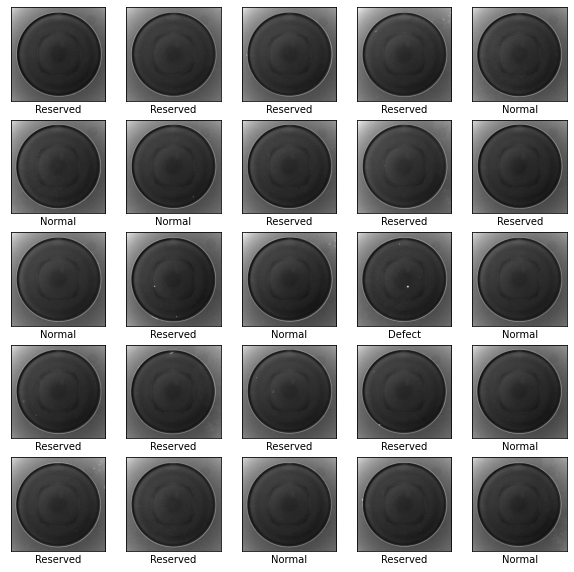

In [9]:
class_names = ["Normal", "Reserved", "Defect"]
pyplot.figure(figsize=(10,10))
for i in range(25):
    pyplot.subplot(5,5,i+1)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(x_train[i], cmap="gray")
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    pyplot.xlabel(class_names[y_train[i]])
pyplot.show()

In [10]:
#print(len(x_train) + len(x_test))

mult = images[0].shape[0] * images[0].shape[1]
print("n pixels:", mult)
print("Reshaping...")
x_train = x_train.reshape(len(x_train), mult)
x_test = x_test.reshape(len(x_test), mult)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Scale the data to lie between 0 to 1. most images have pixel data ranging from 0 to 255
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 2
# convert class vectors to binary class matrices (one hot encoding)
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)


# PCA 40~100 components is most optimal
pca = PCA(n_components=70)

x_train=pca.fit_transform(x_train)
x_test= pca.transform(x_test)

y_train = to_categorical(y_train, num_classes = 2) #change 
y_test = to_categorical(y_test, num_classes = 2) #change

463 train samples
82 test samples


In [11]:
#                      BUILDING THE MODEL
dropouts = [0.2, 0.4, 0.6, 0.8, 1.0]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
accs, val_accs = [], []

for i in range(len(dropouts)):
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(70,)))
    model.add(Dropout(dropouts[i]))
    model.add(Dense(num_classes, activation='sigmoid'))

    model.summary()
    opt=tensorflow.keras.optimizers.SGD(lr=0.01)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    #                      TRAINING THE MODEL
    history = model.fit(x_train, y_train,
                        batch_size=64,
                        epochs=500,
                        verbose=3,
                        validation_data=(x_test, y_test))

    #                      EVALUATE TRAINED MODEL
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss with dropout %.2f : %.4f' % (dropouts[i], score[0]))
    print('Test accuracy with dropout %.2f : %.4f' % (dropouts[i], score[1]))
    accs.appe3nd(history.history['acc'])
    val_accs.append(history.history['val_acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               36352     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
Total params: 300,547
Trainable params: 300,547
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
19/19 [==============================] - 0s 18ms/step - loss: 1199249074441292723106091089526784.0000 - a

In [ ]:
for i in range(len(accs)):
    plt.plot(accs[i], '--', label='train dropout '+str(dropouts[i]), color=colors[i])
    plt.plot(val_accs[i], '-', label='test dropout '+str(dropouts[i]), color=colors[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()